## Week 0, Part 2: Python with Pandas and Matplotlib

In this tutorial we will introduce Pandas and Matplotlib. Pandas uses DataFrames (tables, much like R DataFrames) and Series (columns of a DataFrame) with powerful SQL-like queries. Matplotlib is a package for plotting, which uses a MATLAB-style syntax. Seaborn is built on top of Matplotlib and provides common plot types in a style similar to ggplot in R.

### Download data

I copied the data from http://www.sccoos.org/data/autoshorestations/autoshorestations.php?study=Scripps%20Pier and pasted it into Excel, then saved it as a CSV file named scripps_pier_20151110.csv.

### Import modules

In [1]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt

### Read data from CSV

In [2]:
data1 = pd.read_csv('scripps_pier_20151110.csv', index_col=None, header=0)

In [3]:
data1.head()

,Date,chl (ug/L),pres (dbar),sal (PSU),temp (C)
0,11/10/15 1:42,22.307,3.712,33.199,19.95
1,11/10/15 1:35,22.311,3.588,33.201,19.94
2,11/10/15 1:29,22.305,3.541,33.200,19.95
3,11/10/15 1:23,22.323,3.463,33.200,19.95
4,11/10/15 1:17,22.316,3.471,33.199,19.95


In [4]:
data2 = pd.read_csv('scripps_pier_20151110.csv', index_col=0, header=0)

In [5]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
11/10/15 1:42,22.307,3.712,33.199,19.95
11/10/15 1:35,22.311,3.588,33.201,19.94
11/10/15 1:29,22.305,3.541,33.200,19.95
11/10/15 1:23,22.323,3.463,33.200,19.95
11/10/15 1:17,22.316,3.471,33.199,19.95


In [6]:
data2.describe()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
count,66.000000,66.000000,66.000000,66.00000
mean,22.349576,3.041818,33.199318,20.06697
std,0.038988,0.254295,0.004959,0.06850
min,22.305000,2.714000,33.184000,19.94000
25%,22.319000,2.813250,33.197000,20.04000
50%,22.333500,2.997000,33.199000,20.07000
75%,22.385000,3.215500,33.203000,20.10500
max,22.426000,3.712000,33.206000,20.19000


### Indexing in pandas

From [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html).

Object selection has had a number of user-requested additions in order to support more explicit location based indexing. pandas now supports three types of multi-axis indexing.

* `.loc` is primarily label based, but may also be used with a boolean array. `.loc` will raise `KeyError` when the items are not found. Allowed inputs are:

    - A single label, e.g. `5` or `'a'`, (note that `5` is interpreted as a label of the index. This use is not an integer position along the index)
    - A list or array of labels `['a', 'b', 'c']`
    - A slice object with labels `'a':'f'`, (note that contrary to usual python slices, both the start and the stop are included!)
    - A boolean array

* `.iloc` is primarily integer position based (from 0 to `length-1` of the axis), but may also be used with a boolean array. `.iloc` will raise `IndexError` if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with python/numpy slice semantics). Allowed inputs are:

    - An integer e.g. `5`
    - A list or array of integers `[4, 3, 0]`
    - A slice object with ints `1:7`
    - A boolean array

* `.ix` supports mixed integer and label based access. It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type. `.ix` is the most general and will support any of the inputs in `.loc` and `.iloc`. `.ix` also supports floating point label schemes. `.ix` is exceptionally useful when dealing with mixed positional and label based hierachical indexes. However, when an axis is integer based, ONLY label based access and not positional access is supported. Thus, in such cases, it’s usually better to be explicit and use `.iloc` or `.loc`.

Getting values from an object with multi-axes selection uses the following notation (using `.loc` as an example, but applies to `.iloc` and `.ix` as well). Any of the axes accessors may be the null slice `:`. Axes left out of the specification are assumed to be `:`. (e.g. `p.loc['a']` is equiv to `p.loc['a', :, :]`)

Object Type	| Indexers
------------|---------
Series      | `s.loc[indexer]`
DataFrame   | `df.loc[row_indexer,column_indexer]`
Panel       | `p.loc[item_indexer,major_indexer,minor_indexer]`

### With Date as the index column (data2)

In [7]:
data2.ix[0]

chl (ug/L)     22.307
pres (dbar)     3.712
sal (PSU)      33.199
temp (C)       19.950
Name: 11/10/15 1:42, dtype: float64

In [8]:
data2['temp (C)'].head(10)

Date
11/10/15 1:42    19.95
11/10/15 1:35    19.94
11/10/15 1:29    19.95
11/10/15 1:23    19.95
11/10/15 1:17    19.95
11/10/15 1:11    19.95
11/10/15 1:05    19.96
11/10/15 0:59    19.99
11/10/15 0:53    20.00
11/10/15 0:47    20.01
Name: temp (C), dtype: float64

### With no index column (data1)

In [9]:
data1.ix[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [10]:
data1.loc[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [11]:
data1.iloc[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [12]:
data1['Date'].head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

In [13]:
data1.iloc[:,0].head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

### Convert date/time to timestamp object

In [14]:
time = pd.to_datetime(data1.iloc[:,0])
time.head()
type(time)

pandas.core.series.Series

In [15]:
time

0    2015-11-10 01:42:00
1    2015-11-10 01:35:00
2    2015-11-10 01:29:00
3    2015-11-10 01:23:00
4    2015-11-10 01:17:00
5    2015-11-10 01:11:00
6    2015-11-10 01:05:00
7    2015-11-10 00:59:00
8    2015-11-10 00:53:00
9    2015-11-10 00:47:00
10   2015-11-10 00:41:00
11   2015-11-10 00:35:00
12   2015-11-10 00:29:00
13   2015-11-10 00:23:00
14   2015-11-10 00:17:00
15   2015-11-10 00:11:00
16   2015-11-10 00:05:00
17   2015-11-09 23:59:00
18   2015-11-09 23:53:00
19   2015-11-09 23:47:00
20   2015-11-09 23:41:00
21   2015-11-09 23:35:00
22   2015-11-09 23:29:00
23   2015-11-09 23:23:00
24   2015-11-09 23:17:00
25   2015-11-09 23:11:00
26   2015-11-09 23:05:00
27   2015-11-09 22:59:00
28   2015-11-09 22:53:00
29   2015-11-09 22:47:00
             ...        
36   2015-11-09 22:05:00
37   2015-11-09 21:59:00
38   2015-11-09 21:53:00
39   2015-11-09 21:47:00
40   2015-11-09 21:41:00
41   2015-11-09 21:35:00
42   2015-11-09 21:29:00
43   2015-11-09 21:23:00
44   2015-11-09 21:17:00


### Plot a single variable vs. time

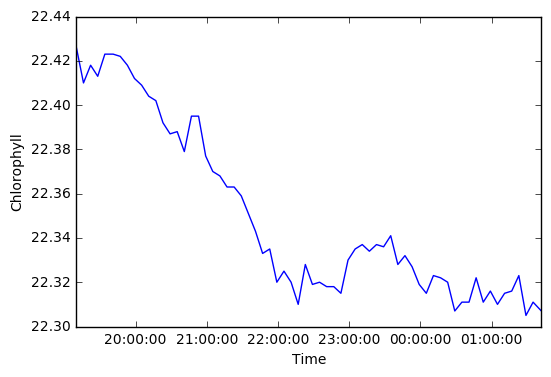

In [16]:
fig = plt.figure()
plt.plot(time, data1['chl (ug/L)'])
plt.xlabel('Time')
plt.ylabel('Chlorophyll')
fig.savefig('scripps_pier_Chlorophyll.pdf')

### Plot each response variable in a loop

In [17]:
data1.rename(columns={'chl (ug/L)': 'Chlorophyll', 'pres (dbar)': 'Pressure', 'sal (PSU)': 'Salinity', 'temp (C)': 'Temperature'}, inplace=True)

In [18]:
data1.head()

,Date,Chlorophyll,Pressure,Salinity,Temperature
0,11/10/15 1:42,22.307,3.712,33.199,19.95
1,11/10/15 1:35,22.311,3.588,33.201,19.94
2,11/10/15 1:29,22.305,3.541,33.200,19.95
3,11/10/15 1:23,22.323,3.463,33.200,19.95
4,11/10/15 1:17,22.316,3.471,33.199,19.95


In [19]:
data1.columns

Index(['Date', 'Chlorophyll', 'Pressure', 'Salinity', 'Temperature'], dtype='object')

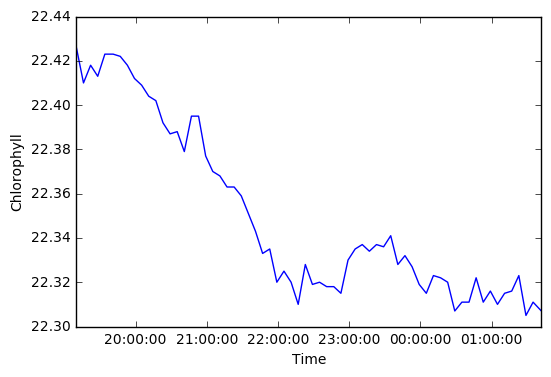

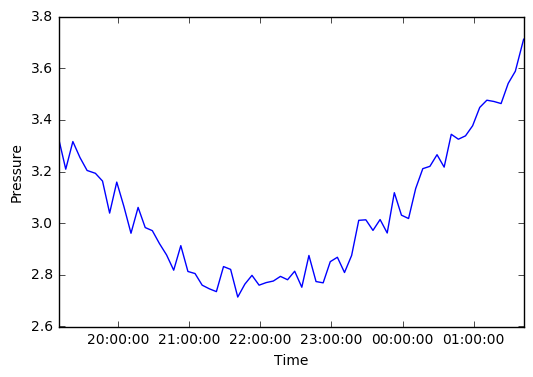

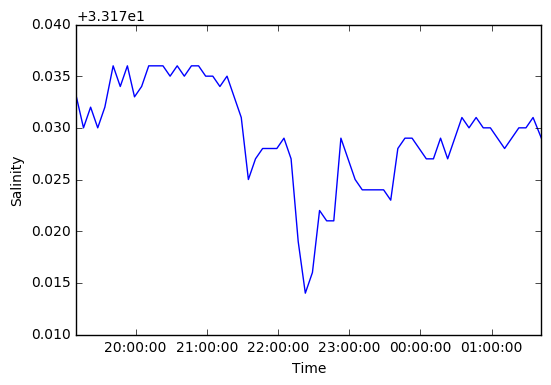

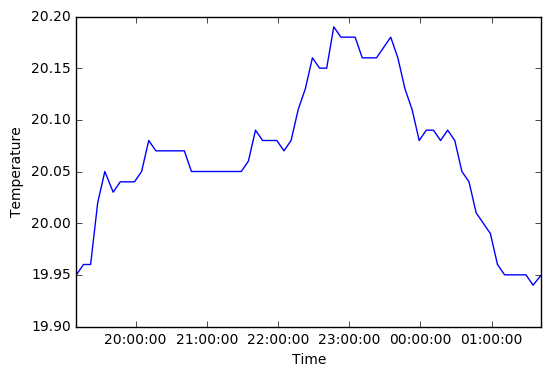

In [20]:
for col in data1.columns:
    if col != 'Date':
        fig = plt.figure()
        plt.plot(time, data1[col])
        plt.xlabel('Time')
        plt.ylabel(col)
        fig.savefig('scripps_pier_%s.pdf' % col)

### Plot all response variables together

In [21]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
11/10/15 1:42,22.307,3.712,33.199,19.95
11/10/15 1:35,22.311,3.588,33.201,19.94
11/10/15 1:29,22.305,3.541,33.200,19.95
11/10/15 1:23,22.323,3.463,33.200,19.95
11/10/15 1:17,22.316,3.471,33.199,19.95


In [22]:
data2.index = pd.to_datetime(data2.index)

In [23]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
2015-11-10 01:42:00,22.307,3.712,33.199,19.95
2015-11-10 01:35:00,22.311,3.588,33.201,19.94
2015-11-10 01:29:00,22.305,3.541,33.200,19.95
2015-11-10 01:23:00,22.323,3.463,33.200,19.95
2015-11-10 01:17:00,22.316,3.471,33.199,19.95


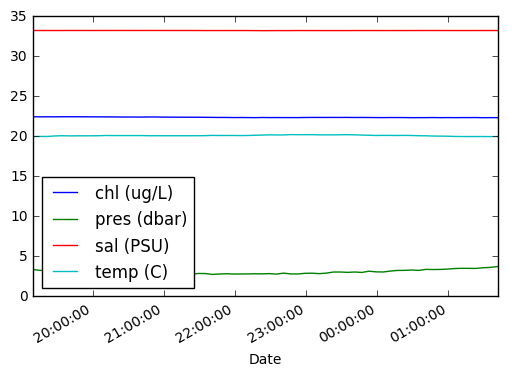

In [24]:
plt.figure()
data2.plot()
plt.legend(loc='best')